# Linaerna regresija

**Linearna regresija** predstavlja problem nalaženja linearne veze između nezavisne promenljive $x$ i zavisne promenljive $y$. Ukoliko je promenljiva $x$ skalar, radi se o prostoj linearnoj regresiji, a ako je promenljiva $x$ vektor, reč je o linearnoj regresiji za funkciju više promenljivih. U oba slučaja, pretpostavka je da je zavisna promenljiva $y$ skalar.

**Prosta linearna regresija** predstavlja nalaženje linearne veze između parova skalara $(x_i, y_i)$, $1 \le i \le n$. Veza je data linearnom funkcijom $f(x) = \beta_0 + \beta_1 x$ po parametrima $\beta_0$ i $\beta_1$ gde su $\beta_0$ i $\beta_1$ parametri koje treba odrediti. Ako je $X=[x_1, \dots, x_n]$ i $Y=[y_1, \dots, y_n]$, izraz se može zapisati u matričnom obliku kao $\begin{bmatrix}1&X\end{bmatrix} \cdot \begin{bmatrix}\beta_0\\\beta_1\end{bmatrix} = Y$, gde je $\begin{bmatrix}1&X\end{bmatrix}$ matrica čija se prva kolona sastoji samo od jedinica, a druga kolona je vektor $X$.

**Linearna regresija za funkciju više promenljivih** predstavlja nalaženje linearne veze između parova vektora i skalara $(X_i, y_i)$, $1 \le i \le n$. Veza je data linearnom funkcijom $f(x_1,\dots,x_m) = \beta_0 + \beta_1 x_1 + \dots + \beta_m x_m$ po parametrima $\beta_0, \dots, \beta_m$ gde su $\beta_0, \dots, \beta_m$ parametri koje treba odrediti. Izraz se može zapisati u matričnom obliku kao $\begin{bmatrix}1&X_1&\cdots&X_m\end{bmatrix} \cdot \begin{bmatrix}\beta_0\\ \vdots \\ \beta_m\end{bmatrix} = Y$, gde je $Y=[y_1, \dots, y_n]$, $\begin{bmatrix}1&X_1&\cdots&X_m\end{bmatrix}$ matrica čija se prva kolona sastoji samo od jedinica, a ostale kolone su redom vektori $X_1,\dots,X_m$. 

Sistem jednačina $\begin{bmatrix}1&X\end{bmatrix} \cdot \begin{bmatrix}\beta_0\\\beta_1\end{bmatrix} = Y$ kod proste linearne regresije, odnosno $\begin{bmatrix}1&X_1&\cdots&X_m\end{bmatrix} \cdot \begin{bmatrix}\beta_0\\ \vdots \\ \beta_m\end{bmatrix} = Y$ kod linearne regresije za funkciju više promenljivih, se najčešće rešava **metodom najmanjih kvadrata**. Takav sistem u praksi obično ima više jednačina nego promenljivih i najčešće nema egzaktno rešenje.

Ako sistem napišemo u obliku $A\beta = Y$, njegovo rešavanje predstavlja nalaženje onog vektora $\beta$ za koji je vrednost izraza $||Y - \beta A||_2^2$ najmanja. Ovde je sa $||a||_2 = \sqrt{a_1^2 + a_2^2 + \dots + a_n^2}$ označena 2-norma vektora $a = (a_1, a_2, \dots, a_n)$. Rešenje je dato u obliku $\beta=(A^{T}A)^{-1}A^{T}Y$, gde se matrica $(A^{T}A)^{-1}A^{T}$ se naziva pseudoinverz matrice $A$.

U slučaju proste linearne regresije, može se pokazati da je $$\beta_1 = \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2}$$ i $\beta_0 = \bar{y} - \beta_1 \bar{x}$, gde je $\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$ aritmetička sredina nezavisnih, a $\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$ zavisnih promenljivih.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Pretpostavimo da raspolažemo skupom parova  $(0, 1.2)$, $(0.5, 2.05)$, $(1, 2.9)$ i $(-0.5,0.1)$ u kojima prvi element predstavlja nezavnisnu promenljivu $x$, a drugi zavisnu promenljivu $y$ i da je potrebno naći linearnu vezu oblika $y=\beta_0+\beta_1x$ između njih.

Za rešavanje zadataka linearne regresije mogu se koristiti funkcije koje smo upoznali u priči o rešavanju preodređenih sistema.

In [3]:
points= [(0, 1.2), (0.5, 2.05), (1, 2.9), (-0.5, 0.1)]
x = np.array([point[0] for point in points])
y = np.array([point[1] for point in points])

In [4]:
from sklearn import linear_model

In [5]:
model = linear_model.LinearRegression()
model.fit(x.reshape(-1, 1), y)

LinearRegression()

In [6]:
model.intercept_

1.1

In [7]:
model.coef_

array([1.85])

Ipak, u praksi se, posebno u zadacima mašinskog učenja, mnogo češće koristi biblioteka  `scikit-learn`.

**Scikit-learn** je Python biblioteka namenjena mašinskom učenju. U njoj su implementirani mnogobrojni algoritmi klasifikacije, regresije i grupisanja, kao i rutine koje prate pripremu podataka i evaluaciju modela. Na [zvaničnom sajtu](https://scikit-learn.org/stable/) možete istražiti više o funkcionalnostima same biblioteke, a mi ćemo se u daljem radu usredsrediti na linearne modele dostupne kroz `linear_model` paket. 

Greška modela linearne regresije može se prikazati na više načina. 


`Srednja apsolutna greška (engl. mean absolute error, MAE)` je prosečna vrednost sume apsolutnih razlika između stvarne i predviđene vrednosti, $\text{MAE} = \frac{1}{n}\sum_{i=1}^n{|y_i - \hat{y_i}|}$.

`Srednjekvadratna greška (engl. mean squared error, MSE)` je prosečnoa vrednost sume kvadrata razlika između stvarne i predviđene vrednosti, $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n}{( y_i - \hat{y_i})^2}$. Za nju koristimo i termin suma kvadrata reziduala (engl. residual square sum, RSS).

`Koeficijent determinacija $R^2$` se račina kao $R^2= 1 - \frac{RSS}{TSS}$, gde je $TSS = \sum_{i=1}^{n} {(y_i-\overline{y})^2}$ ukupna suma kvadrata razlike između stvarne i očekivane vrednosti. Što je vrednost bliža jedinici, greška je manja.

Ove vrednosti možemo izračunati korišćenjem funkcija `metrics` biblioteke `scikit-learn`.

In [8]:
from sklearn import metrics

In [9]:
y_predicted = model.predict(x.reshape(-1, 1))

In [10]:
y_predicted

array([1.1  , 2.025, 2.95 , 0.175])

In [11]:
y

array([1.2 , 2.05, 2.9 , 0.1 ])

In [12]:
mae = metrics.mean_absolute_error(y, y_predicted)

In [14]:
mae

0.06250000000000006

In [17]:
r2 = metrics.r2_score(y, y_predicted)

In [18]:
r2

0.9956363636363637

U nastavku će kroz primer reklamiranja na različitim medijima (TV-u, radiju i novinama) biti prikazano kako se linearna regresija može iskoristiti za kreiranje modela koji predviđa uspešnost prodaje. 

U datoteci `advertising.csv` se nalaze informacije o cenama (izraženim u hiljadama dolara) reklamnih usluga na određenom tržištu. Prva kolona se odnosi na cene reklamiranja na televiziji, druga na radiju, a treća u novinama. Četvrta kolona se odnosi na ukupnu prodaju proizvoda koji su se reklamirali na datim medijima. Potrebno je kreirati linearni model koji predviđa prodaju na osnovu cena reklamiranja.

In [21]:
data = pd.read_csv('data/advertising.csv', index_col=0)

In [22]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [23]:
data.shape

(200, 4)

In [24]:
tv = data['TV']
radio  = data['Radio']
newspaper = data['Newspaper']
sales = data['Sales']

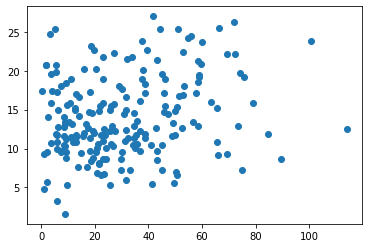

In [27]:
plt.scatter(newspaper, sales)

In [28]:
X = data [['TV', 'Radio', 'Newspaper']]

In [29]:
model = linear_model.LinearRegression()
model.fit(X, sales)

LinearRegression()

In [30]:
model.intercept_

2.9388893694594067

In [31]:
model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [32]:
# sales_predicted = model.predict(X)

In [34]:
# metrics.r2_score(sales, sales_predicted)

Trenutno smo sve raspoložive podatke iskoristili za kreiranje modela pa nemamo podatke na kojima objektivno možemo oceniti kako se ponaša naš model. Zato ćemo se vratiti jedan korak unazad i pre određivanja modela, podeliti podatke na skup za obučavanje modela i skup za testiranje (ocenu) modela. <img src='assets/train_test_podela.png'>

U ovome nam može pomoći funkcija `train_test_split` dostupna u okviru paketa `model_selection` biblioteke `scikit-learn`. Njom se vrši podela skupa u željenoj razmeri (parametar `test_size`) uz kontrolu podele (parametar `random_state`).

In [35]:
from sklearn import model_selection

In [36]:
X_train, X_test, sales_train, sales_test = model_selection.train_test_split(X, sales, test_size=0.33, random_state=1)

In [37]:
model = linear_model.LinearRegression()
model.fit(X_train, sales_train)

LinearRegression()

In [38]:
model.coef_

array([0.04574124, 0.180924  , 0.0031418 ])

In [39]:
model.intercept_

3.019195161687442

In [40]:
sales_predicted = model.predict(X_test)

In [41]:
metrics.r2_score(sales_test, sales_predicted)

0.9142453857006445

Različitim podelama polaznog skupa na skup za treniranje i skup za tesiranje se dobijaju različiti modeli koji imaju nešto drugačije ocene (to možemo lako proveriti promenama parametra random_state). Zbog toga neke podele mogu dati ili previše optimistične ili previše stroge ocene. `Unakrsna validacija` je tehnika kojom se ovakvo ocenjivanje može iskontrolisati. Ona podrazumeva podelu polaznog skupa podataka na $k$ delova (gde je $k$ unapred izabrana vrednost) i obučavanje i testiranje ukupno $k$ modela po shemi prikazanoj na slici. <img src='assets/unakrsna_validacija.png'> 

Svaki model se trenira nad posebno izdvojenih $k-1$ delova (obojenih plavom bojom) i testira na preostalom delu (obojenom narandžastom bojom). Dalje se performanse ovako dobijenih modela mogu agregirati u jednu vrednosti.  

Za evaluaciju modela tehnikom unakrsne validacije može se koristiti metod `cross_val_score`. Njegovi parametri su tip modela, ceo skup podataka i broj podela (parametar `cv`, ekvivalent broja `k`). Podrazumevano se za ocenu modela koristi srednjekvadratna greška, ali se preko parametra `scoring` može navesti i neka druga vrednost.

In [42]:
model = linear_model.LinearRegression()
scores = model_selection.cross_val_score(model, X, sales, cv=10)

In [43]:
scores

array([0.87302696, 0.8581613 , 0.92968723, 0.89013272, 0.93146498,
       0.93138735, 0.7597901 , 0.91217097, 0.83891753, 0.92882311])

In [44]:
scores.mean()

0.8853562237979616

In [47]:
tv_radio = data[['TV', 'Radio']]
# sales 

In [48]:
model_tv_radio = linear_model.LinearRegression()

In [49]:
scores_tv_radio = model_selection.cross_val_score(model_tv_radio, tv_radio, sales, cv=10)

In [50]:
scores_tv_radio.mean()

0.8869670516810129